In [1]:
# Part 1 of question two :



! pip install --upgrade --no-cache-dir gdown
! gdown 1EqYX552b90gRE6h19xOKLYZgNkPXaxS_

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1EqYX552b90gRE6h19xOKLYZgNkPXaxS_
To: /content/data_banknote_authentication.txt
100% 46.4k/46.4k [00:00<00:00, 68.0MB/s]


In [2]:
# Part 1 of question two :

import pandas as pd
import numpy as np
from sklearn.utils import shuffle

file = pd.read_csv (r'/content/data_banknote_authentication.txt')
#file = read_file.to_csv (r'/content/data_banknote_authentication.csv')
headerlist = ['feature1' , 'feature2','feature3','feature4','feature5']
file.to_csv("/content/data_banknote_authentication.csv" ,header = headerlist)
df = pd.read_csv("/content/data_banknote_authentication.csv")
df = shuffle(df)
df

,Unnamed: 0,feature1,feature2,feature3,feature4,feature5
583,583,0.33565,6.836900,0.69718,-0.556910,0
1312,1312,-1.50780,-7.319100,7.89810,1.228900,1
376,376,-1.99220,11.654200,2.65420,-5.210700,0
1062,1062,-2.00660,-6.719000,9.01620,0.099985,1
629,629,2.59890,3.517800,0.76230,0.811190,0
...,...,...,...,...,...,...
271,271,4.40720,-0.070365,2.04160,1.131900,0
170,170,4.05520,-2.458300,2.28060,1.032300,0
159,159,5.04520,3.896400,-1.43040,0.862910,0
1216,1216,0.61652,3.894400,-4.72750,-4.394800,1


In [3]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression , SGDClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = df[["feature1" ,"feature2" , "feature3" , "feature4"]].values

y = df[["feature5"]].values # target = feature5
X ,y

(array([[ 0.33565,  6.8369 ,  0.69718, -0.55691],
        [-1.5078 , -7.3191 ,  7.8981 ,  1.2289 ],
        [-1.9922 , 11.6542 ,  2.6542 , -5.2107 ],
        ...,
        [ 5.0452 ,  3.8964 , -1.4304 ,  0.86291],
        [ 0.61652,  3.8944 , -4.7275 , -4.3948 ],
        [ 3.5761 ,  9.7753 , -3.9795 , -3.4638 ]]),
 array([[0],
        [1],
        [0],
        ...,
        [0],
        [1],
        [0]]))

In [4]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)
x_train.shape , x_test.shape , y_train.shape , y_test.shape


((1096, 4), (275, 4), (1096, 1), (275, 1))

In [5]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [6]:
def logistic_regression(x , w):
  y_hat = sigmoid(x @ w)
  return y_hat

In [7]:
def bce(y , y_hat):
  loss = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
  return loss

In [8]:
def gradient(x , y  ,y_hat):
  grads = (x.T @(y_hat - y)) / len(y)
  return grads

In [9]:
def gradient_descent(w , eta , grads):
  w -= eta*grads
  return w

In [10]:
def accuracy(y , y_hat):
  acc = np.sum(y==np.round(y_hat)) / len(y)
  return acc

In [11]:
x_train = np.hstack((np.ones((len(x_train) , 1)) , x_train))
x_train.shape

(1096, 5)

In [12]:
m = 4
w = np.random.randn(m+1 , 1)
print(w.shape)
eta = 0.01
n_epochs = 4000

(5, 1)


In [13]:
error_hist = []
for epoch in range(n_epochs):
  y_hat = logistic_regression(x_train , w)

  e = bce(y_train , y_hat)
  error_hist.append(e)
  grads = gradient(x_train , y_train , y_hat)
  w = gradient_descent(w , eta , grads)
  if(epoch + 1) % 100 == 0:
    print(f"Epoch = {epoch} , \t E = {e:.4} \t w={w.T[0]}")

Epoch = 99 , 	 E = 0.3242 	 w=[-0.24404457 -1.7346059  -0.52709923  0.01901018 -0.35938925]
Epoch = 199 , 	 E = 0.1887 	 w=[-0.19438949 -1.67918929 -0.48955038 -0.32560463 -0.37046214]
Epoch = 299 , 	 E = 0.1506 	 w=[-0.14075924 -1.6377588  -0.52403868 -0.50092222 -0.35482661]
Epoch = 399 , 	 E = 0.1341 	 w=[-0.08331357 -1.61441103 -0.56926893 -0.60163122 -0.34288584]
Epoch = 499 , 	 E = 0.1244 	 w=[-0.02409574 -1.60300653 -0.61200727 -0.66637199 -0.33783529]
Epoch = 599 , 	 E = 0.1172 	 w=[ 0.03512759 -1.59867502 -0.64920692 -0.71322906 -0.33764446]
Epoch = 699 , 	 E = 0.1114 	 w=[ 0.09333632 -1.59857257 -0.68122286 -0.75029558 -0.34016183]
Epoch = 799 , 	 E = 0.1064 	 w=[ 0.15001736 -1.6011013  -0.70907784 -0.78135884 -0.34395848]
Epoch = 899 , 	 E = 0.102 	 w=[ 0.20493715 -1.60532827 -0.73368063 -0.80838735 -0.34819174]
Epoch = 999 , 	 E = 0.09809 	 w=[ 0.25801198 -1.6106831  -0.75571702 -0.83251388 -0.35238783]
Epoch = 1099 , 	 E = 0.09453 	 w=[ 0.30923896 -1.61680352 -0.77568921 -

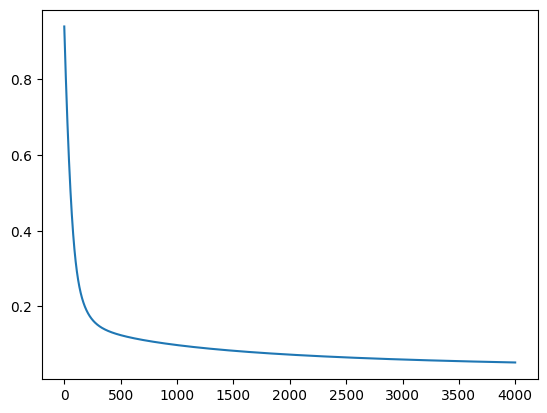

In [14]:
plt.plot(error_hist)

In [15]:
# accuracy :

x_test = np.hstack((np.ones((len(x_test) , 1)), x_test))
x_test.shape

(275, 5)

In [16]:
y_hat = logistic_regression(x_test , w)
accuracy(y_test , y_hat)

0.9854545454545455

In [17]:
# normalized data :
maxx = df[['feature1', 'feature2' , 'feature3' , 'feature4']].max()

#print("Maximum value in column 'feature1', 'feature2' , 'feature3' , 'feature4': ")


minn = df[['feature1', 'feature2' , 'feature3' , 'feature4']].min()
#print("Minimum value in column 'feature1', 'feature2' , 'feature3' , 'feature4': ")


for i in range(4):
  df[f'feature{i+1}'] = (df[f'feature{i+1}']-minn[i])/(maxx[i]- minn[i])
  print(df[f'feature{i+1}'])

583     0.532040
1312    0.399101
376     0.364169
1062    0.363131
629     0.695253
          ...   
271     0.825657
170     0.800273
159     0.871666
1216    0.552295
452     0.765723
Name: feature1, Length: 1371, dtype: float64
583     0.771197
1312    0.241499
376     0.951453
1062    0.263954
629     0.647001
          ...   
271     0.512737
170     0.423384
159     0.661167
1216    0.661093
452     0.881147
Name: feature2, Length: 1371, dtype: float64
583     0.257750
1312    0.567954
376     0.342055
1062    0.616120
629     0.260555
          ...   
271     0.315665
170     0.325961
159     0.166097
1216    0.024064
452     0.056286
Name: feature3, Length: 1371, dtype: float64
583     0.726633
1312    0.889013
376     0.303473
1062    0.786363
629     0.851032
          ...   
271     0.880193
170     0.871137
159     0.855734
1216    0.377661
452     0.462315
Name: feature4, Length: 1371, dtype: float64


In [18]:
X = df[["feature1" ,"feature2" , "feature3" , "feature4"]].values

y = df[["feature5"]].values
X , y

(array([[0.53204033, 0.77119668, 0.25775002, 0.72663284],
        [0.39910146, 0.24149944, 0.56795399, 0.88901316],
        [0.36416935, 0.95145315, 0.34205527, 0.30347254],
        ...,
        [0.87166562, 0.66116738, 0.16609731, 0.85573438],
        [0.55229503, 0.66109255, 0.02406358, 0.37766078],
        [0.76572269, 0.8811474 , 0.05628621, 0.46231485]]),
 array([[0],
        [1],
        [0],
        ...,
        [0],
        [1],
        [0]]))

In [19]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)
x_train.shape , x_test.shape , y_train.shape , y_test.shape


((1096, 4), (275, 4), (1096, 1), (275, 1))

In [20]:
x_train = np.hstack((np.ones((len(x_train) , 1)) , x_train))
x_train.shape

(1096, 5)

In [21]:
m = 4
w = np.random.randn(m+1 , 1)
print(w.shape)
eta = 0.01
n_epochs = 10000

(5, 1)


In [22]:
error_hist = []
for epoch in range(n_epochs):
  y_hat = logistic_regression(x_train , w)

  e = bce(y_train , y_hat)
  error_hist.append(e)
  grads = gradient(x_train , y_train , y_hat)
  w = gradient_descent(w , eta , grads)
  if(epoch + 1) % 100 == 0:
    print(f"Epoch = {epoch} , \t E = {e:.4} \t w={w.T[0]}")

Epoch = 99 , 	 E = 0.7311 	 w=[-1.24439063  0.40230793 -1.23491472  0.03689697  1.22422549]
Epoch = 199 , 	 E = 0.7068 	 w=[-1.11917173  0.39262016 -1.19312134  0.07758963  1.2923132 ]
Epoch = 299 , 	 E = 0.6942 	 w=[-1.02853454  0.36409801 -1.1705367   0.10765661  1.33601196]
Epoch = 399 , 	 E = 0.6864 	 w=[-0.96018464  0.32368136 -1.16027285  0.13078846  1.36406574]
Epoch = 499 , 	 E = 0.6805 	 w=[-0.90579516  0.27605955 -1.15761376  0.14945494  1.38235696]
Epoch = 599 , 	 E = 0.6753 	 w=[-0.86004975  0.22421939 -1.15953102  0.16522343  1.39462554]
Epoch = 699 , 	 E = 0.6704 	 w=[-0.81964826  0.17001    -1.16414062  0.1790655   1.40318773]
Epoch = 799 , 	 E = 0.6658 	 w=[-0.78257044  0.11455949 -1.17029021  0.19157757  1.40946025]
Epoch = 899 , 	 E = 0.6612 	 w=[-0.7475883   0.05855024 -1.17728213  0.20312492  1.41430462]
Epoch = 999 , 	 E = 0.6567 	 w=[-0.71395793  0.00239256 -1.18469711  0.21393192  1.41824361]
Epoch = 1099 , 	 E = 0.6523 	 w=[-0.68122923 -0.05366817 -1.19228506  0

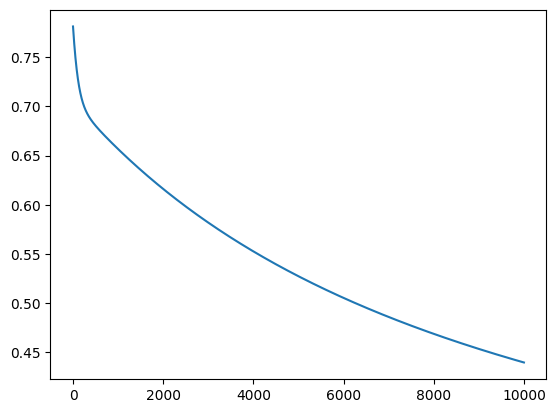

In [23]:
plt.plot(error_hist)

In [24]:
x_test = np.hstack((np.ones((len(x_test) , 1)), x_test))
x_test.shape

(275, 5)

In [25]:
y_hat = logistic_regression(x_test , w)
accuracy(y_test , y_hat)

0.8363636363636363

<Axes: >

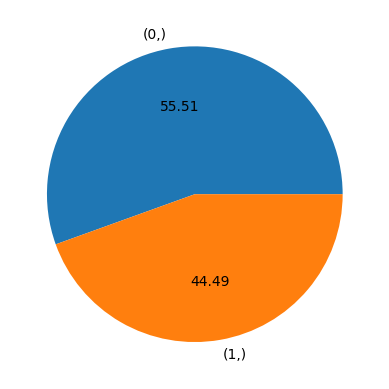

In [26]:
# part 6 :

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# value_count = y.value_counts()
# value_count
new_y = pd.DataFrame(y, columns=['Column_A'])
new_y.value_counts()
new_y.value_counts().plot.pie(autopct = "%.2f")

In [27]:
! pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


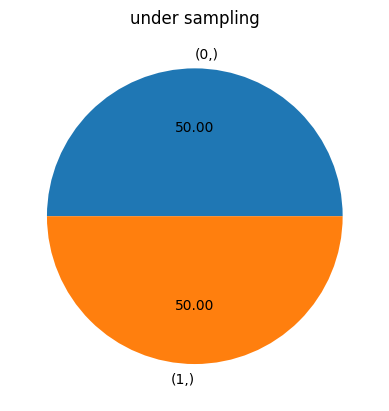

In [28]:
# undersampling :
from imblearn.under_sampling import RandomUnderSampler

y = pd.DataFrame(y, columns=[''])
rus = RandomUnderSampler(sampling_strategy=1)
x_res_undersampling , y_res_undersampling = rus.fit_resample(X , y)
ax = y_res_undersampling.value_counts().plot.pie(autopct = '%.2f')
_ = ax.set_title("under sampling")

In [29]:
# part 7 :

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = x_res_undersampling
y = y_res_undersampling
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

In [30]:
model = LogisticRegression()
model.fit(X , y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [31]:
y_hat = model.predict(x_test)
model.score(x_test , y_test)
y_test.shape ,
y_hat = y_hat.reshape(244 , 1)
y_test.shape , y_hat.shape

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat)
score

0.9959016393442623

In [35]:
# In imbalance mode and using ready libraries :

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression , SGDClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = df[["feature1" ,"feature2" , "feature3" , "feature4"]].values
y = df[["feature5"]].values
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)
model = LogisticRegression(random_state = 93, solver='sag', max_iter=200)
model.fit(X , y)
y_hat = model.predict(x_test)
model.score(x_test , y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9745454545454545